In [2]:
import numpy as np
import sys
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [8]:
#importing any stock (I'm using AAPL) stock data and writing to pandas DF
ticker = input("Enter stock ticker: ") 
stock = yf.Ticker(f"{ticker}")
df = stock.history(period="1y")[::-1] #reversing the data so it's decreasing in time

In [9]:
#If you want to get the data to a csv file
df.to_csv(f'{ticker}.csv')

In [4]:
#Basic EDA
# Display the first few rows of the dataframe
print(df.head())

# Get the summary statistics of the numerical columns
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# Check the number of rows and columns in the dataframe
print(df.shape)

# Check for missing values in the dataframe
print(df.isnull().sum())


                                 Open        High         Low       Close  \
Date                                                                        
2025-01-07 00:00:00-05:00  242.979996  245.550003  241.350006  242.210007   
2025-01-06 00:00:00-05:00  244.309998  247.330002  243.199997  245.000000   
2025-01-03 00:00:00-05:00  243.360001  244.179993  241.889999  243.360001   
2025-01-02 00:00:00-05:00  248.929993  249.100006  241.820007  243.850006   
2024-12-31 00:00:00-05:00  252.440002  253.279999  249.429993  250.419998   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-01-07 00:00:00-05:00  40797900        0.0           0.0  
2025-01-06 00:00:00-05:00  45045600        0.0           0.0  
2025-01-03 00:00:00-05:00  40244100        0.0           0.0  
2025-01-02 00:00:00-05:00  55740700        0.0           0.0  
2024-12-31 00:00:00-05:00  39480700        0.0           0.0  
             Open  

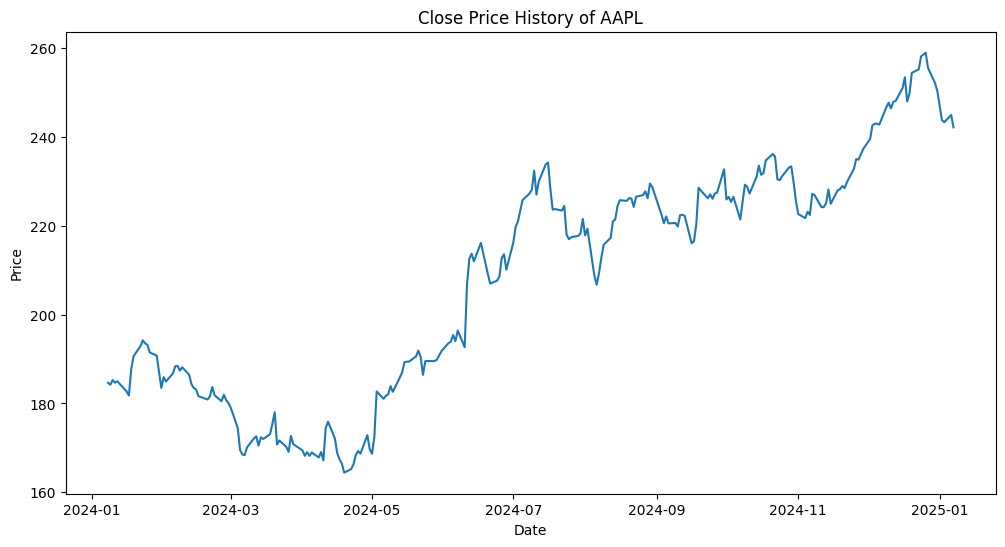

In [5]:
#Graphing the close vs time
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price history')
plt.title(f'Close Price History of {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [6]:
#Getting the delta values
close = df['Close'].values
delta = np.zeros_like(close)
delta[1:] = np.where(close[:-1] != 0, (close[1:] / close[:-1]) - 1, 0)

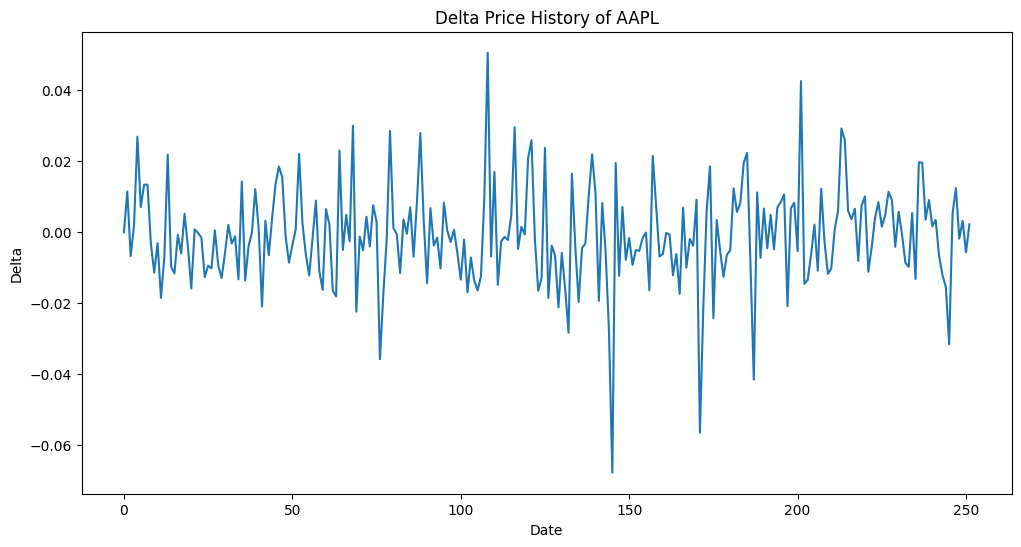

In [7]:
#Graphing the delta vs time
plt.figure(figsize=(12,6))
plt.plot(delta, label='Delta Price history')
plt.title(f'Delta Price History of {ticker}')
plt.xlabel('Date')
plt.ylabel('Delta')
plt.show()

In [14]:
#Building functions to deal with vol

#Normalizing the dataset and then denormalizing it


class Normalize:
    def __init__(self, data):
        self.minx = []
        self.maxx = []
    def normalize(self, x):
        x = np.array(x)
        self.minx = min(x)
        self.maxx = max(x)
        return (x - self.minx) / (self.maxx - self.minx)
    def denormalize(self, x):
        return x * (self.maxx - self.minx) + self.minx

#Building the test and training set

def BuildDataSet(pct):
    """
    Using a window of 150 days as the build for testing

    pct: the percentage change of the stock DoD
    """
    window = 150
    result = []
    for i in range(window, len(pct)):
        hold = pct[i-window:i]
        result.append(np.std(hold))
    return result
def BuildTrainSet(vol):
    """
    Using the prediction of volitility as the target, generate the training set

    vol: the volitility of the stock
    """
    window = 100
    output = 30
    inputs = []
    outputs = []
    for i in range(window, len(vol)-output+1):
        inp_ = vol[i-window:i]
        out_ = vol[i:i+output]
        inputs.append(inp_)
        outputs.append(out_)
    IN = [torch.tensor(i , dtype = torch.float32) for i in inputs]
    OUT = [torch.tensor(i, dtype = torch.float32) for i in outputs]
    TEST = torch.tensor(vol[-window], dtype = torch.float32)
    return torch.stack(IN), torch.stack(OUT), torch.stack((TEST,))

#FINAL OUTPUT for the training set
normal = Normalize(delta)
Volatility = BuildDataSet(delta)
nVol = normal.normalize(Volatility)
TIN, TOUT, TTEST = BuildTrainSet(nVol)
print(TIN)


In [ ]:
# Value at Risk and expected shortfall
# Value at Risk

# Expected Shortfall

